# In-Class Quiz Nº 1

<hr style="border:1px  solid black"> </hr>

### (Fill in)
## Name: 
## Number: 

In [ ]:
#Model tuninnig
#Xtrain0, Xvalid, ytrain0, yvalid
#𝚗⎯𝚎𝚜𝚝𝚒𝚖𝚊𝚝𝚘𝚛𝚜 : 200, 225, 250, 275 and 300
'''
topScore=0.
for a in alphaArray:
    sgd=SGDClassifier(penalty=’l2’,alpha=a).fit(Xtrain0,ytrain0)
    currentScore=sgd.score(Xvalid,yvalid)
    if currentSocre>topScore:
        topScore=currentScore
        bestAlpha=a
'''
'''
model = RandomForestClassifier(random_state=42, max_depth=10).fit(X1p,y1)
y2eR= model.predict(X2p)
'''

#rfClass=RandomForestClassifier()
#model = RandomForestClassifier(random_state=42, max_depth=10).fit(X1p,y1)

'''Ne = [200, 225, 250, 275, 300]
depth=np.arange(2,6)
parD={’n estimators’:Ne,’max depth’:depth}
cv=StratifiedKFold(n splits=3,shuffle=True,random state=42)

from sklearn.model_selection import GridSearchCV
grs=GridSearchCV(model, param_grid={'n_estimators':[200, 225, 250, 275, 300]}).fit(Xtrain0, ytrain0)
print(grs)
'''

<hr style="border:1px  solid black"> </hr>

## Develop and run the requested code in the cells immediately below the questions.

# IMPORTANTE:
## Once completed, save this Jupyter notebook with the following name:
## Axxxxx-Q1.ipynb (Axxxxx: student number)
##  and then upload the file to the Moodle link provided for that purpose.

<hr style="border:2px solid black"> </hr>

# Data: $\texttt{breast_cancer}$ dataset of $\texttt{sklearn}$
### Consider the $\texttt{breast_cancer}$ dataset of $\texttt{sklearn}$, divided into two sub-sets, training/testing, according to the commands in the next cell.
* ### X1: training data ($400\times30$ array)
* ### y1: classes of the training data
* ### X2: test data (array de $169\times30$)
* ### y2: classes of the test data

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, roc_curve
from sklearn.model_selection import  train_test_split
import sklearn.datasets as DT
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

D=DT.load_breast_cancer()
X=D.data
y=D.target

################################################################
#Consider malignant cases as positive (class 1)
# Need to invert classes
y=np.abs(y-1)
################################################################

#division int training and test sub-sets
X1,X2,y1,y2=train_test_split(X,y,test_size=169,stratify=y,random_state=42)

# Question 1: Logistic Discriminants
##  Consider a logistic discriminant with the following parameters $\texttt{C=2}$, $\texttt{solver='saga'}$, $\texttt{penalty='l1'}$ and $\texttt{max_iter=5000}$. Train the classifier with the training set.
### a) Print the total number of errors and the confusion matrix  (non-normalized) of this classifier for the test set.



In [2]:
logD=LogisticRegression(penalty='l1',solver='saga',C=2,max_iter=5000).fit(X1,y1)
y2e=logD.predict(X2)
print('Total number of errors',np.sum(y2!=y2e)) # nuermor de erros
print('Confusion Matrix:')
print(confusion_matrix(y2,y2e))

Total number of errors 13
Confusion Matrix:
[[105   1]
 [ 12  51]]


### b) Calibrate this classifier in order to have a maximum number of false negatives in the test less than or equal to 5, while keeping the total number of errors below 15.¶

In [3]:
# extra
y2c=logD.decision_function(X2)

y2ee=(r2e>1)*1    # *1 para passar de true para 1 e false para 0


print('Total number of errors',np.sum(y2!=y2e)) # nuermor de erros
print('Confusion Matrix:')
print(confusion_matrix(y2,y2e))

NameError: name 'r2e' is not defined

In [4]:
#extra
y2c=logD.decision_function(X2)

y2ee=(r2e>1)*-1    # *1 para passar de true para 1 e false para 0


print('Total number of errors',np.sum(y2!=y2e)) # nuermor de erros
print('Confusion Matrix:')
print(confusion_matrix(y2,y2e))

NameError: name 'r2e' is not defined

In [5]:
y2c=logD.decision_function(X2)
thresh=-1.5
print('Total number of errors',np.sum(y2!=(y2c>thresh)))  # 
print('Confusion Matrix:')
print(confusion_matrix(y2,y2c>thresh))

Total number of errors 14
Confusion Matrix:
[[97  9]
 [ 5 58]]


### c) Plot the ROC curve of this classifier with the test data. Include in this plot the operational point of the classifiers in items 1.a) and 1.b).

Text(0,0.5,'TP-rate')

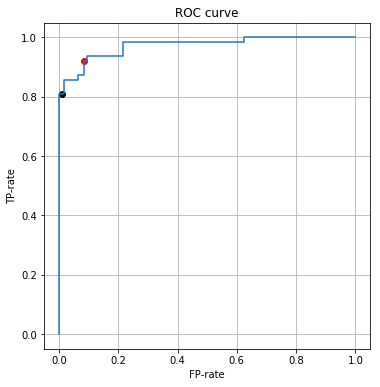

In [6]:
# ROc curve false possitive rate ou false alarms
# TP-rate vs FP-Rate

#False positive, true positive, thresold 
fpr,tpr,t=roc_curve(y2,y2c)

#Classificador 1
#fp-rate=FP/(FP+TN)
p11=1/(105+1)
#tp-rate=TP/(TP+FN)
p12=51/(51+12)

#Classificador 2
#fp-rate=FP/(FP+TN)
p21=9/(97+9)
#tp-rate=TP/(TP+FN)
p22=58/(5+58)

plt.figure(figsize=(6,6))
plt.plot(p11,p12,'ok')
plt.plot(p21,p22,'or')

plt.plot(fpr,tpr)
plt.axis('scaled')
plt.grid(True)
plt.title('ROC curve')
plt.xlabel('FP-rate')
plt.ylabel('TP-rate')

<hr style="border:2px solid black"> </hr>

# Question 2 - SVMs:
## Consider a $\texttt{SVC}$ classifier with the following parameters: $\texttt{kernel='rbf'}$ and $\texttt{C=2}$.
### a) Preprocess the data using the function  $\texttt{StandardScaler}$. Train this function with the training data and apply the transformation to the training and test sets. Use the pre-processed data in the following items.



## 2.a)

In [7]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler().fit(X1)
X1n=sc.transform(X1)# datos preprocessados do standart scaler
X2n=sc.transform(X2)


### b) Train the $\texttt{SVC}$ classifier with the training data and plot the ROC curve of this classifier with the test data. Include in this plot the operating point of the classifier.

[[106   0]
 [  3  60]]


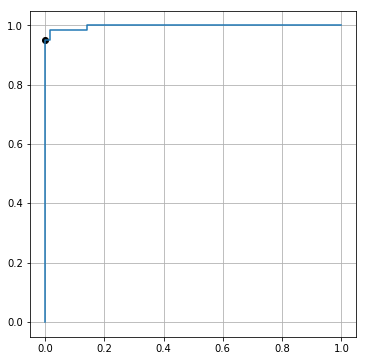

In [8]:
svm=SVC(kernel='rbf',C=2).fit(X1n,y1)
y2c=svm.decision_function(X2n)
fpr,tpr,t=roc_curve(y2,y2c)

print(confusion_matrix(y2,svm.predict(X2n)))

#fp-rate=FP/(FP+TN) - falso positivo
p1=0
#tp-rate=TP/(TP+FN)
p2=60/(3+60) #recall

plt.figure(figsize=(6,6))
plt.plot(p1,p2,'ok')
plt.plot(fpr,tpr)
plt.axis('scaled')
plt.grid(True)



### c)  Calibrate the classifier from the previous section to obtain one (1) false negative in the test data. After calibration, what is the minimum number of false positives obtained in the test set?¶

In [9]:
# baixar o thresold ate dar 1  falso positiv
print(confusion_matrix(y2,y2c>=-.35))
print('Number of false positives = 2')

[[104   2]
 [  1  62]]
Number of false positives = 2
